In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
X=pd.read_csv('weatherHistory.csv')

In [4]:
X

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


<Axes: >

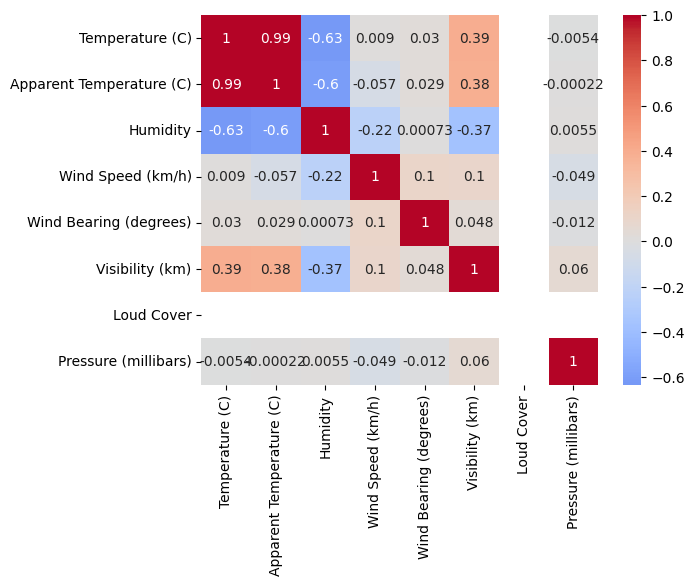

In [5]:
sns.heatmap(X.corr(numeric_only=True),cmap='coolwarm',center=0,annot=True)

In [6]:
y=X['Temperature (C)']
X=X[['Humidity', 'Visibility (km)']]

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

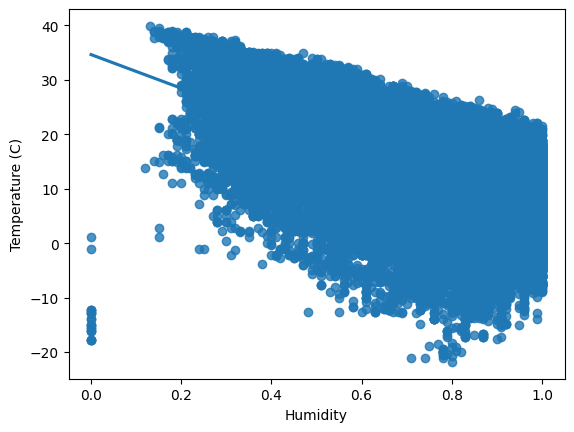

In [7]:
sns.regplot(x='Humidity',y=y, data=X)

<Axes: xlabel='Visibility (km)', ylabel='Temperature (C)'>

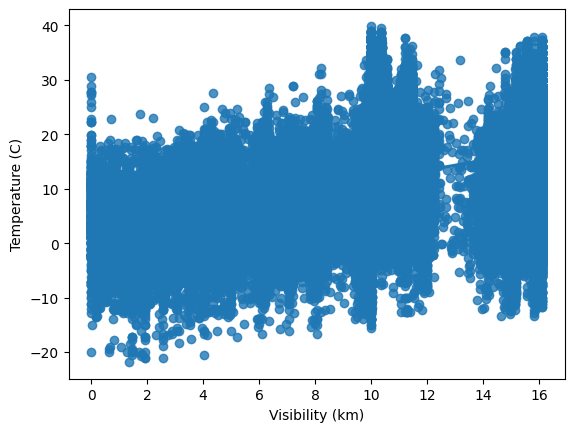

In [8]:
sns.regplot(x='Visibility (km)',y=y, data=X)

In [9]:
import sklearn.model_selection
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.2,shuffle=True)

In [10]:
X_train

,Humidity,Visibility (km)
45250,0.66,9.9820
65716,0.70,15.8263
22303,0.73,9.9820
41395,0.58,11.3988
62309,0.78,15.1823
...,...,...
67204,0.94,10.8031
81480,0.96,3.9123
25414,0.90,5.2164
26071,0.86,11.2056


In [11]:
y

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

In [12]:
X.corr()

,Humidity,Visibility (km)
Humidity,1.000000,-0.369173
Visibility (km),-0.369173,1.000000


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Humidity         96453 non-null  float64
 1   Visibility (km)  96453 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


In [14]:
X.describe()

,Humidity,Visibility (km)
count,96453.000000,96453.000000
mean,0.734899,10.347325
std,0.195473,4.192123
min,0.000000,0.000000
25%,0.600000,8.339800
50%,0.780000,10.046400
75%,0.890000,14.812000
max,1.000000,16.100000


In [15]:
y

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn import tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [17]:
from sklearn.metrics import mean_squared_error


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression Mean Squared Error: {mse_linear}")

lasso_reg = Lasso(alpha=0.02)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {mse_lasso}")


ridge_reg = Ridge(alpha=10.0)  
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")

dtree_reg = tree.DecisionTreeRegressor()
dtree_reg.fit(X, y)
y_pred_dtree = dtree_reg.predict(X_test)
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
print(f"Dtree Mean Squared Error: {mse_dtree}")

svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM Regression Mean Squared Error: {mse_svm}")

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regression Mean Squared Error: {mse_rf}")


Linear Regression Mean Squared Error: 52.12176823033661
Lasso Regression Mean Squared Error: 52.12038634449162
Ridge Regression Mean Squared Error: 52.11976176115059
Dtree Mean Squared Error: 35.73982988751048


In [ ]:
X_simp=pd.DataFrame(X['Humidity'])

In [ ]:
X_train_simp,X_test_simp,y_train_simp,y_test_simp=sklearn.model_selection.train_test_split(X_simp,y,test_size=0.2,shuffle=True)

In [ ]:

linear_reg_simp = LinearRegression()
linear_reg_simp.fit(X_train_simp, y_train_simp)
y_pred_linear_simp = linear_reg_simp.predict(X_test_simp)
mse_linear_simp = mean_squared_error(y_test, y_pred_linear_simp)
print(f"Linear Regression Mean Squared Error: {mse_linear_simp}")


lasso_reg_simp = Lasso(alpha=0.02)
lasso_reg_simp.fit(X_train_simp, y_train_simp)
y_pred_lasso_simp = lasso_reg_simp.predict(X_test_simp)
mse_lasso_simp = mean_squared_error(y_test, y_pred_lasso_simp)
print(f"Lasso Regression Mean Squared Error: {mse_lasso_simp}")


ridge_reg_simp = Ridge(alpha=10.0)  
ridge_reg_simp.fit(X_train_simp, y_train_simp)
y_pred_ridge_simp = ridge_reg_simp.predict(X_test_simp)
mse_ridge_simp = mean_squared_error(y_test, y_pred_ridge_simp)
print(f"Ridge Regression Mean Squared Error: {mse_ridge_simp}")


dtree_reg_simp = tree.DecisionTreeRegressor()
dtree_reg_simp.fit(X_train_simp, y_train_simp)
y_pred_dtree_simp = dtree_reg_simp.predict(X_test_simp)
mse_dtree_simp = mean_squared_error(y_test, y_pred_dtree_simp)
print(f"Decision Tree Regression Mean Squared Error: {mse_dtree_simp}")

rf_reg_simp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_simp.fit(X_train_simp, y_train_simp)
y_pred_rf_simp = rf_reg_simp.predict(X_test_simp)
mse_rf_simp = mean_squared_error(y_test, y_pred_rf_simp)
print(f"Random Forest Regression Mean Squared Error: {mse_rf_simp}")

# SVM Regression 
# svm_reg_simp = SVR()
# svm_reg_simp.fit(X_train, y_train)
# y_pred_svm_simp = svm_reg_simp.predict(X_test)
# mse_svm_simp = mean_squared_error(y_test, y_pred_svm_simp)
# print(f"SVM Regression Mean Squared Error: {mse_svm_simp}")

Linear Regression Mean Squared Error: 128.38121313401027
Lasso Regression Mean Squared Error: 127.17109856142756
Ridge Regression Mean Squared Error: 128.13876250345714
Decision Tree Regression Mean Squared Error: 132.70493095422887
Random Forest Regression Mean Squared Error: 132.70993178829028
